In [9]:
#pip install statsmodels

In [1]:
from datetime import datetime
import pandas
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=Warning)

In [2]:
# Data contains weather data for Seattle
data = pandas.read_csv('data/seattleWeather_1948-2017.csv', parse_dates=['date'])

In [3]:
data.head()

,date,amount_of_precipitation,max_temperature,min_temperature,rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [4]:
# Remove all dates after July 1 because we have to to plant onions before summer begins
data = data[[d.month < 7 for d in data.date]].copy()

In [5]:
data["year"] = [(d.year + d.timetuple().tm_yday / 365.25) for d in data.date]

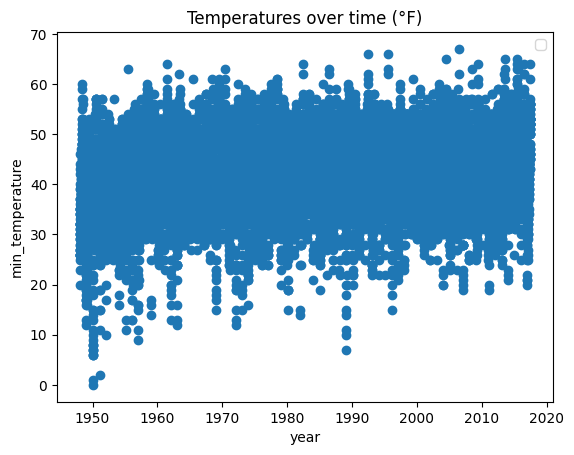

In [6]:
# Let's take a quick look at our data
plt.scatter(data["year"], data["min_temperature"])

# add labels and legend
plt.xlabel("year")
plt.ylabel("min_temperature")
plt.title("Temperatures over time (°F)")
plt.legend()

In [12]:
import statsmodels.formula.api as smf

# Perform linear regression to fit a line to our data
# NB OLS uses the sum or mean of squared differences as a cost function,
# which we're familiar with from our last exercise 
model = smf.ols(formula = "min_temperature ~ year", data = data).fit()

intercept = model.params[0]
slope = model.params[1]

# Print the model
print("Intercept: ", intercept)
print("Slope: ", slope)

print(f"The model is: y = {slope:0.3f} * X + {intercept:0.3f}")

Intercept:  -83.07288146914783
Slope:  0.06294086653213299
The model is: y = 0.063 * X + -83.073


In [13]:
class MyModel:

    def __init__(self):
        self.slope = 0
        self.intercept = 0

    def predict(self, date):
        return date * self.slope + self.intercept

    def get_summary(self):
        return f"y = {self.slope} * x + {self.intercept}"

In [14]:
import numpy as np

x = data.year
temperature_true = data.min_temperature

intercepts = np.linspace(-100,-70,10)
slopes = np.linspace(0.060,0.07,10)


def cost_function(temperature_estimate):
    return np.mean((temperature_true - temperature_estimate) ** 2)

def predict_and_calc_cost(intercept, slope):
    temperature_estimate = x * slope + intercept

    return cost_function(temperature_estimate)

def calculate_gradient(temperature_estimate):
    """
    This calculates the gradient for a linear regession 
    by using the Mean Squared Error cost function
    """
    error = temperature_estimate - temperature_true
    grad_intercept = np.mean(error) * 2
    grad_slope = (x * error).mean() * 2

    return grad_intercept, grad_slope

In [15]:
def gradient_descent(learning_rate, number_of_iterations):
    """
    Performs gradient descent for a one-variable function. 

    learning_rate: Larger numbers follow the gradient more aggressively
    number_of_iterations: The maximum number of iterations to perform
    """
    model = MyModel()
    model.intercept = -83
    model.slope = 0

    for i in range(number_of_iterations):
        predicted_temperature = model.predict(x)

        _, grad_slope = calculate_gradient(predicted_temperature)

        model.slope -= learning_rate * grad_slope

        if( i % 100 == 0):
            estimate = model.predict(x)
            cost = cost_function(estimate)
            print("Next estimate:", model.get_summary(), f"Cost: {cost}")

    print(f"Final estimate:", model.get_summary())

gradient_descent(learning_rate=1E-9, number_of_iterations=1000)

Next estimate: y = 0.0004946403321335815 * x + -83 Cost: 15374.064817888926
Next estimate: y = 0.034564263954523125 * x + -83 Cost: 3218.050332426434
Next estimate: y = 0.050035120236006536 * x + -83 Cost: 711.4491469584532
Next estimate: y = 0.057060363506525755 * x + -83 Cost: 194.58159053167708
Next estimate: y = 0.060250493523378544 * x + -83 Cost: 88.00218235322349
Next estimate: y = 0.06169911660055105 * x + -83 Cost: 66.02523660294695
Next estimate: y = 0.06235692954504888 * x + -83 Cost: 61.4935343467107
Next estimate: y = 0.0626556393176375 * x + -83 Cost: 60.559085785362484
Next estimate: y = 0.06279128202425543 * x + -83 Cost: 60.36640010911254
Next estimate: y = 0.06285287674109104 * x + -83 Cost: 60.32666783130979
Final estimate: y = 0.06288066221361607 * x + -83


In [16]:
gradient_descent(learning_rate=1E-8, number_of_iterations=200)

Next estimate: y = 0.004946403321335815 * x + -83 Cost: 13267.277888290606
Next estimate: y = 0.06288803098785394 * x + -83 Cost: 60.317363492453254
Final estimate: y = 0.0629041077135948 * x + -83


In [17]:
gradient_descent(learning_rate=5E-7, number_of_iterations=500)

Next estimate: y = 0.24732016606679072 * x + -83 Cost: 133774.64171440934
Next estimate: y = 9.500952345613634e+45 * x + -83 Cost: 3.549071667291563e+98
Next estimate: y = 4.8948068107652476e+92 * x + -83 Cost: 9.420015144175701e+191
Next estimate: y = 2.52176127646564e+139 * x + -83 Cost: 2.500278766819551e+285
Next estimate: y = 1.2991891572708264e+186 * x + -83 Cost: inf
Final estimate: y = -2.2830799448010082e+232 * x + -83
